In [1]:
#from pysr import PySRRegressor, TemplateExpressionSpec

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [178]:
lm = 5000

In [179]:
def get_lensing_camb(omb, omc):
    pars = camb.set_params(H0 = 67.4, ombh2 = omb, omch2 = omc, lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [180]:
ombs = [0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]
omcs = [0.04,0.07, 0.1, 0.12, 0.15, 0.18, 0.19, 0.21, 0.23]

#ombs = [0.02, 0.022, 0.022]
#omcs = [0.1, 0.1, 0.12]

ells = np.array([l for l in range(2, lm)])

n = len(omcs)
lensings_camb = [get_lensing_camb(ombs[i], omcs[i]) for i in range(n)]

label_key = ["$\\Omega_bh^2$ = " + str(ombs[i]) + ", $\\Omega_ch^2$ = " + str(omcs[i]) for i in range(n)]

fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [181]:
fid_ombh2 + fid_omch2

0.1424

In [264]:
1.00932196* 5272.961455245723

5322.115791013066

In [268]:
def lensing_tail_fit(ell, ombh2, omch2):
    x2 = (ombh2 + omch2)/(fid_omch2 + fid_ombh2)
    x1 = ombh2/fid_ombh2
        
    beta_1 =0.697 * (1 + 0.87109623 * x2 + -0.57724449 * x2**2) 
    beta_2 = 2804.9860015044 * (1 + -0.04361507  * x2 + 0.03248953  * x2**2) 
    
    beta_3 = 5322.11579 * (1 + 0.18394894682848015 * x2 + -0.2933971266963615 * x2**2) 
    beta_4 = 58.2769 * (1 + 14.64262499 * x2 + -7.62268543 *x2**2) 
    alpha = 2.48174003 *(1 + -0.40269701 * x2 + 0.51372176 * x2 **2)
        
    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L

In [269]:
lensings_fit = [lensing_tail_fit(ells, ombs[i], omcs[i]) for i in range(n)]

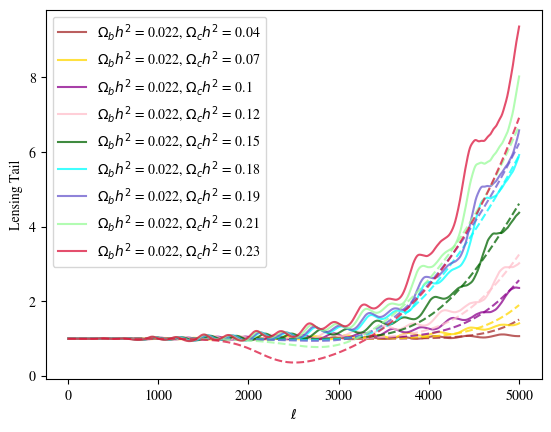

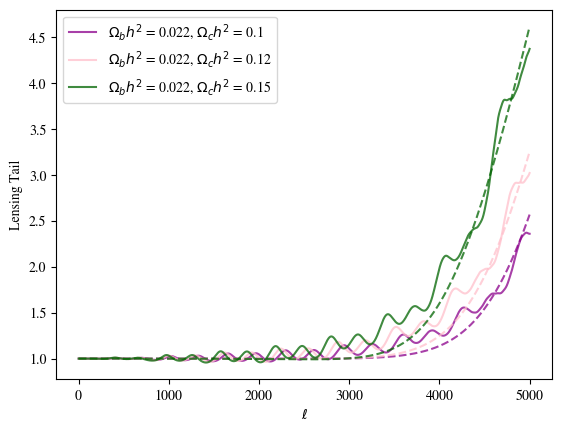

In [270]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()
plt.show()
for i in [2,3,4]: #[1,2,3]:
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.legend()
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.show()